# Trabajo Semanal N°5
<img src="logo_UTN.svg" title="Logo UTN" align="right" width="150"> 

## Teoría de Circuitos II
### Alumno: Federico Albero
### Curso: R4001

### Enunciado:
**1)** Se debe diseñar un filtro **pasa-altos**, que presente máxima planicidad en la banda de paso (frecuencia de corte $f_c=300Hz$) y un cero de transmisión en $f_z=100Hz$. El **prototipo pasabajos normalizado** presenta la siguiente respuesta:
<img src="enunciado.png" title="Consigna" align="left" width="700"> 

### Desarrollo conceptual:

A continuación, se adjunta documento PDF con la resoluación analítica de los siguientes incisos del trabajo:
* **A)** Determinación de la expresión $H_{(s)}$ del filtro pasa-altos normalizado.
* **B)** Diagrama de polos y ceros de $H_{(s)}$.
* **C)** Síntesis circuital del filtro pedido, utilizando una estructura de segundo orden dada.


In [1]:
from IPython.display import IFrame
IFrame("./TS5_FAlbero_R4001.pdf", width=1000, height=1000)

* **D)** Comparación entre la estructura sugerida y la red ropuesta por Schaumann, discutiendo similitudes y diferencias:

##### Estructura de segundo orden propuesta:
<img src="estructura_propuesta.png" title="Red 1" align="left" width="700">

##### Estructura de segundo orden que figura en el Schaumann:
<img src="estructura_Schaumann.png" title="Red 2" align="left" width="700">

**Análisis:** 
* La principal diferencia que se encuentra entre ambas redes circuitales es que, la red propuesta en el trabajo vendría ser un caso particular de la red circuital que figura en el libro de Schaumann (pág. 216) para los valores de los coeficientes **a=1, b=0 y c=1**.
* Como consecuencia de estos valores adoptados, el capacitor "aC" y el resistor "R/c" estarán completamente levantados de masa (a=1 y c=1), mientras que el resistor "QR/(1-b)" estará completamente aterrizado a masa ya que b=0.
* Otra diferencia que se encuentra entre ambas redes circuitales es que, en la primera, el capacitor C se encuentra en la posición Z4, correspondiente al circuito _GIC Antoniou_, mientras que en el segundo circuito este se encuentra en la posición de Z2. Cabe aclarar que el comportamiento del circuito girador es mayormente el mismo, sin importar si C es colocado en Z2 o Z4, solo con ligeras diferencias con respecto a la estabilidad el mismo.
* En la red propuesta para el trabajo, hay dos resistencias, R1 y R2, que tienen un valor distinto a las demás (R), ya que en base al valor de estas dos resistencias podré colocar un cero de transmisión en una frecuencia distinta a la de los polos complejos conjugados del denominador, generando así el efecto de un filtro nothc pasa-altos. Esto se podrá visualizar con mayor claridad observando la función transferencia correspondiente de cada red circuital:


**Función transferencia red propuesta para el trabajo:**
\begin{equation}
T(s) = \frac{V_{o (s)}}{V_{i (s)}} = \frac{s² + (\frac{R_1-R_2}{R_1}) \cdot \frac{1}{RR_2C²}}{s^2+s\frac{1}{R_1C}+\frac{1}{RR_2C²}}
\end{equation}
    
**Función transferencia red propuesta por Schaumann:**
\begin{equation}
T(s) = \frac{V_{o (s)}}{V_{i (s)}} = \frac{ s²\cdot (2a-c) + s\frac{\omega_0}{Q} \cdot (2b-c) + c \cdot \omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}
\end{equation}

\begin{equation}
Donde: \omega_0=\frac{1}{RC}\,y\,Q=1
\end{equation}

\begin{equation}
0 \leq a \leq 1;
0 \leq b \leq 1;
0 \leq c \leq 1
\end{equation}

### Simulación numérica:

#### Función transferencia del filtro pasa-bajos prototipo (normalizada y factorizada)

<IPython.core.display.Math object>

#### Función transferencia del filtro pasa-altos objetivo (normalizada y factorizada)

<IPython.core.display.Math object>

[[1,
  [<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
   <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>]],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 [3, ()],
 [4,
  <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>]]

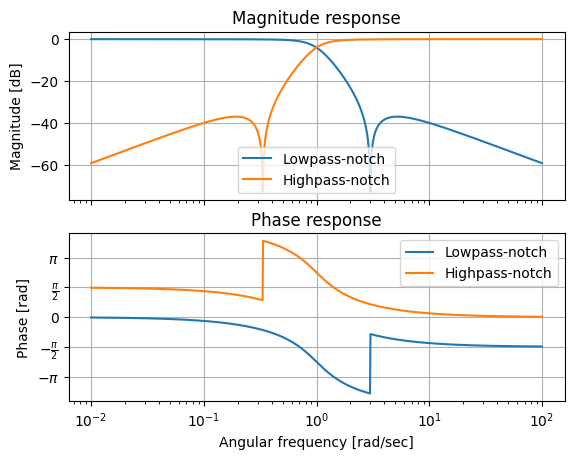

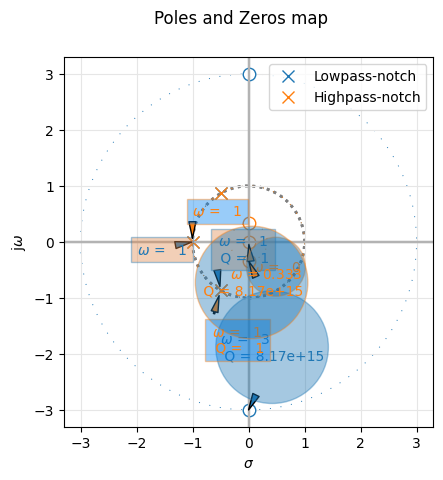

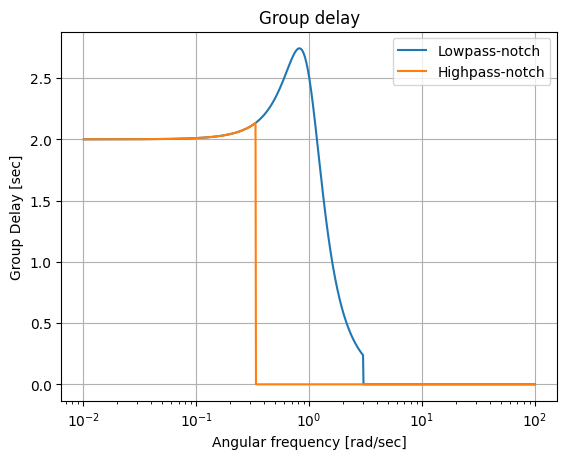

In [1]:
#%% TRABAJO PRÁCTICO SEMANAL N°5 %%#
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 21 22:41:21 2023

@author: fede23
"""
# Modulos:
import scipy.signal as sig
import matplotlib.pyplot as plt

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# esto dejarlo así, no tocar, es para graficar
all_sys = []
filter_names = []

#%% Valores plantilla de diseño %%#

# Plantilla LPF
n = 3 # orden
wc = 1 # frecuencia de corte normalizada
wz = 1/3 # frecuencia de los ceros de transmisión normalizada

# Plantilla HPF
omega_c = 1/wc
omega_z = 1/wz

#%% Notch - pasa bajos prototipo %%#

z1,p1,k1 = sig.buttap(n)
num1, den1 = sig.zpk2tf(z1,p1,k1)
# Modifico el numerador de la transferencia para agregar el cero de transmisión
num1 = [(1/(omega_z**2)), 0, 1]
tf1 = sig.TransferFunction(num1, den1)
all_sys.append(tf1)
label1 = 'Lowpass-notch'
print_subtitle('Función transferencia del filtro pasa-bajos prototipo (normalizada y factorizada)')
# factorizamos en SOS's
sos1 = tf2sos_analog(num1, den1)
pretty_print_SOS(sos1, mode='omegayq')
filter_names.append(label1)

#%% Notch - pasa altos objetivo %%#

num2, den2 = sig.lp2hp(num1, den1)
z2,p2,k2 = sig.tf2zpk(num2, den2)
tf2 = sig.TransferFunction(num2, den2)
all_sys.append(tf2)
label2 = 'Highpass-notch'
print_subtitle('Función transferencia del filtro pasa-altos objetivo (normalizada y factorizada)')
# factorizamos en SOS's
sos2 = tf2sos_analog(num2, den2)
pretty_print_SOS(sos2, mode='omegayq')
filter_names.append(label2)

#%% Grafico %%#

plt.close('all') # cierro todo antes de graficar nuevamente por las dudas
analyze_sys( all_sys, filter_names)



##### Mediciones en la simulación numérica:

<img src="zoom_pzk.png" title="Diagrama PZK" align="left" width="700">

**Diagrama de polos y ceros:** Se realizó un recorte de la imagen generada en Spyder para poder visualizar con mayor presición los polos y ceros del filtro. En la imagen se destacan (en color naranja) los 3 polos sobre la circunferencia de radio unitario, verificando así el orden $n=3$ del filtro que se dedujó en primera instancia. Además, se puede apreciar como el par de ceros complejos conjugados sobre el eje $jw$ se encuentran por debajo de la circunferencia unitaria, por lo que se compueba que $w_{polos} > w_{ceros}$ y por lo tanto, el caracter de filtro notch pasa-altos de este circuito.

<img src="zoom_corte.png" title="Frecuencia de corte">

**Frecuencia de corte:** Se efectuó un zoom en el gráfico de $|H_{(s)}|$ para poder medir la frecuencia de corte del filtro. Como se adoptó como norma de impedancia a $\Omega_w=2 \pi \cdot f_c = 2 \pi \cdot 300Hz$, entonces la frecuencia de corte normalizada corresponde a $w=1$, en la cual se mide una atenuación de aproximadamente 4dB. Dicha atenuación de 4dB está compuesta por 3dB debido a los polos de máxima planicidad y 1dB provocados por el cero de transmisión.

En esta imagen también se puede apreciar la máxima planicidad en la banda de paso con una ganancia plana de 0dB, la cual era uno de los requerimientos de la plantilla de diseño.

<img src="zoom_cero.png" title="Cero de transmisición">

**Cero de transmisión:** Se efectuó un zoom en el gráfico de $|H_{(s)}|$ para poder medir el cero de transmisión del filtro. Debido a la norma de frecuencia adoptada, el cero de transmisión de $f_z=100Hz$ corresponde a $w=\frac{1}{3}\cong0.3333$ en frecuencia angular normalizada. Allí, se puede apreciar como la transferencia cae abruptamente y se llega hasta una atenuación de aproximadamente 72dB.

### Simulación circuital:

##### Implementación circuital de la red utilizando la estructura propuesta en el trabajo:
<img src="TS5_red1_circuito.png" title="Red 1, cicuito">

##### Gráfico:
<img src="TS5_red1_grafico_v.png" title="Red 1, grafico">

##### Implementación circuital de la red utilizando la estructura propuesta por Schaumann:
<img src="TS5_red2_circuito.png" title="Red 2, cicuito">

_Aclaración: Debido a que LTSpice no diferencia entre las letras mayúsculas y las minúsculas (case insensitive), se optó por cambiar al coeficiente de prealimentación "c" por "d", para así no generar conflictos con el valor "C" de los capacitores._

##### Gráfico:
<img src="TS5_red2_grafico_v.png" title="Red 2, grafico">

**Análisis:** A través de la simulación circuital, se pudieron verificar los resultados obteniedos anteriormente mediante la simulación numérica. Además:
* Se logra obtener mediciones mas precisa del gráfico de $|T_{(s)}|$ para las frecuencias de $f_z=100Hz$ y $f_c=300Hz$, las cuales fueron indicadas con cursores en LTSpice.
* Se puede observar, al igual que en la simulación numérica, el salto en la fase que provoca el par de ceros complejos conjugados sobre el eje $jw$.
* Máxima planicidad en la banda de paso.
* Ambos circuitos fueron probados para normas de impedancia $\Omega_z=1$ y $\Omega_z=1K$, en cuyos caso se obtuvieron los mismos resultados que los mostrados.
* Observando los valores de los coeficientes obtenidos: 
    * $a=\frac{5}{9}$
    * $b=\frac{1}{18}$
    * $c=\frac{1}{9}$
    
    y comparando sus valores con los que figuran en la _Tabla 5.4 del Schaumann_, se verifica que la sección de segundo orden implementada con la estructura que figura en el libro es del tipo notch pasa-altos.

##### Tabla 5.4 Schaumann (página 216)
<img src="tabla-5.4_Schaumann.png" title="Tabla 5.4">

#### Extra: 
Se adjunta a continuación las páginas 215 y 216 del libro Schaumann, las cuales fueron de gran utilidad para la resolución de este trabajo, en especial para la implementación de la red circuital y el análisis de los coeficientes de la prealimentación.

In [3]:
from IPython.display import IFrame
IFrame("./Schaumann_215-216.pdf", width=1000, height=1000)